In [40]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import seaborn as sns
import pandas as pd
from matplotlib import rcParams
from scipy.special import lambertw
from scipy.stats import gennorm
from scipy.special import gamma
from scipy.integrate import quad
import matplotlib.ticker as ticker

def calc_harmonic(n):
    return sum(1/d for d in range(1, n + 1))

In [69]:
ns = 120  #12 or 120
nd = 200  #20 or 200

########################################################
#Fig 4: ns=120 & nd=200
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/mean01ns120nd200_exp'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/meanS008D01ns120nd200_exp'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/meanS01D008ns120nd200_exp'

folder = '/Users/alexander/Desktop/RandomLandscapes/dataExp_s01'
#folder = '/Users/alexander/Desktop/RandomLandscapes/dataExp_ss01_sd008'
#folder = '/Users/alexander/Desktop/RandomLandscapes/dataExp_ss008_sd01'

#Fig S6: ns=12 & nd=20
#folder = '/Users/alex/polybox/MNM/ClusterCode/Data_alpha0004/data_avg1m_ns12_nd20_s01_v3'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/mean01ns12nd20_exp'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/meanS01D005ns12nd20_exp'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/meanS005D01ns12nd20_exp'

#folder = '/Users/alexander/Desktop/RandomLandscapes/dataExp_s01_small'
#folder = '/Users/alexander/Desktop/RandomLandscapes/dataExp_ss01_sd005_small'
#folder = '/Users/alexander/Desktop/RandomLandscapes/dataExp_ss005_sd01_small'


#Fig S5: ns=120 & nd=200 with Pareto distribution
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/mean01shape25ns120nd200_pareto'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/meanS01D008shape25ns120nd200_pareto'
#folder = '/Users/alexander/Desktop/RandomLandscapes/Old/meanS008D01shape25ns120nd200_pareto'


########################################################



ris0 = []
ris = []
f = []

for sfile in sorted(glob.glob(folder+'/*ris.npy')):
    result = re.search(''+folder+'/(.*)_', sfile)
    seed = result.group(1)
    ris.append(np.load(folder+"/"+seed+"_ris.npy"))
    ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
    f.append(np.load(folder+"/"+seed+"_fit.npy"))

x = np.load(glob.glob(folder+'/*MS.npy')[0])
ris = np.array(ris)
ris0 = np.array(ris0)
f = np.array(f)

print("ris.shape", ris.shape)


landscapes = ris.shape[0]

"""
alpha = 4*10**(-3)
mus = 10**(-10)
mud = 10**(-10)*alpha
mus=mus*3*0.76
mud=mud*3*0.99*0.52
U = ns*mus/5.80 + nd*mud/9.63
Us = ns*mus/5.80
"""

alpha = 4.1*10**(-3)
mus = 1.2*10**(-8)
mud = 1.2*10**(-8)*alpha
mus=mus*3*0.76
mud=mud*3*0.99*0.51
U = ns*mus/6.09 + nd*mud/10.23
Us = ns*mus/6.09

fractionAAlevel = mud/10.23*nd/(mud/10.23*nd+mus/6.09*ns)

print("mus",mus)
print("fractionAAlevel", fractionAAlevel)

Avg_meanline = 0

for i in range(landscapes):
    w_SN = np.random.exponential(scale=0.1, size=ns)
    w_DN = np.random.exponential(scale=0.1, size=nd)
    meanSNB=np.mean(w_SN)
    meanDNB=np.mean(w_DN)
    meanline = fractionAAlevel*2*meanDNB/(fractionAAlevel*2*meanDNB+(1-fractionAAlevel)*2*meanSNB)

    Avg_meanline += meanline

fraction_of_time_a_AAsub_only_due_to_doubles =Avg_meanline/landscapes
print("Mean fraction", fraction_of_time_a_AAsub_only_due_to_doubles)
print("ris[:,:,ns+1:].sum(axis=2).mean(axis=0)[0]", ris[:,:,ns+1:].sum(axis=2).mean(axis=0)[0])


N_list = []
for i in range(len(x)):
    ms = x[i]
    N = np.floor(ms/U)
    N_list.append(N) 
N_list = np.array(N_list)


ΔW_SD = []
ΔW_S = []

for j in range(ris.shape[1]):
    R = ris[:,j,:]
    ΔW_SD.append(((f-1.) * R).sum(axis=1).mean())
    
    R = ris0[:,j,:]
    ΔW_S.append(((f[:,:ns+1]-1.) * R).sum(axis=1).mean())
    
ΔW_SD = np.array(ΔW_SD)
ΔW_S = np.array(ΔW_S)
y= (ΔW_SD-ΔW_S)/ΔW_S

ris.shape (992, 60, 321)
mus 2.7359999999999998e-08
fractionAAlevel 0.002695218289094904
Mean fraction 0.0027129999685088202
ris[:,:,ns+1:].sum(axis=2).mean(axis=0)[0] 0.0027254153225806477


# ns=12, nd=20 with exponential distribution

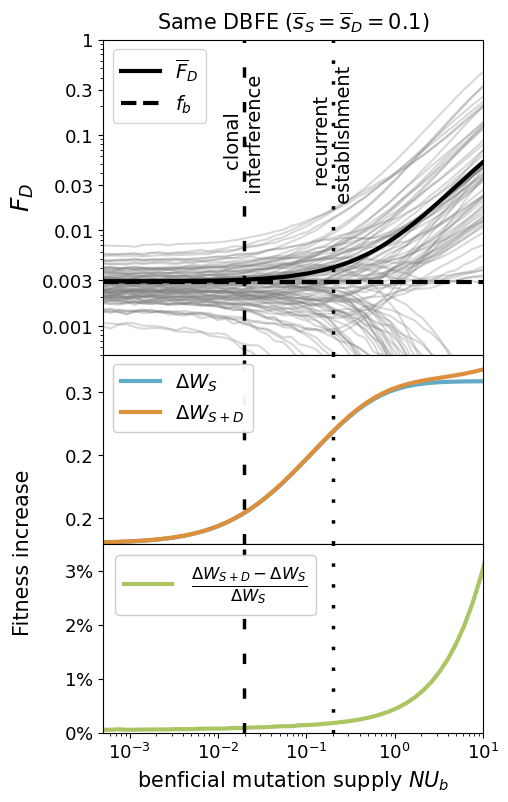

In [60]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.9, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii >= 0 and ii <100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


# Add text at the vertical line
axes[0].text(np.real(epsilon/(4*lambertw(epsilon/(4*U))))+0.0006, 0.095, 'clonal \n interference', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)
axes[0].text(np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))+0.005, 0.095, 'recurrent \n establishment', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)

axes[0].set_ylabel('$F_D$', fontsize=18)
axes[0].set_title('Same DBFE ($\\overline{s}_S=\overline{s}_D=0.1$)', fontsize=15,pad=8)

axes[0].set_ylim(0.0005,1)
axes[0].set_yscale("log")

axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3,1]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3,1], fontsize=13)

axes[0].legend(fontsize=14, loc=0)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.18,0.33)


axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
legend = axes[1].legend(fontsize=14, loc=2)
legend.get_frame().set_alpha(0.95)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.035)
#axes[2].set_yscale("log")


axes[2].set_yticks([0.0,0.01,0.02, 0.03])
axes[2].set_yticklabels(["$0 \\%$","$1 \\%$","$2 \\%$", "$3 \\%$"], fontsize=13)

legend = axes[2].legend(fontsize=17)
legend.get_frame().set_alpha(0.95)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.3),10)
axes[2].set_xscale("log")

fig.text(-0.06, 0.31, 'Fitness increase', va='center', rotation='vertical', fontsize=15)


plt.tick_params(axis="x", labelsize=13) 


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
plt.savefig("FD_W_12_sigma01.pdf", transparent=True, bbox_inches='tight')
plt.show()


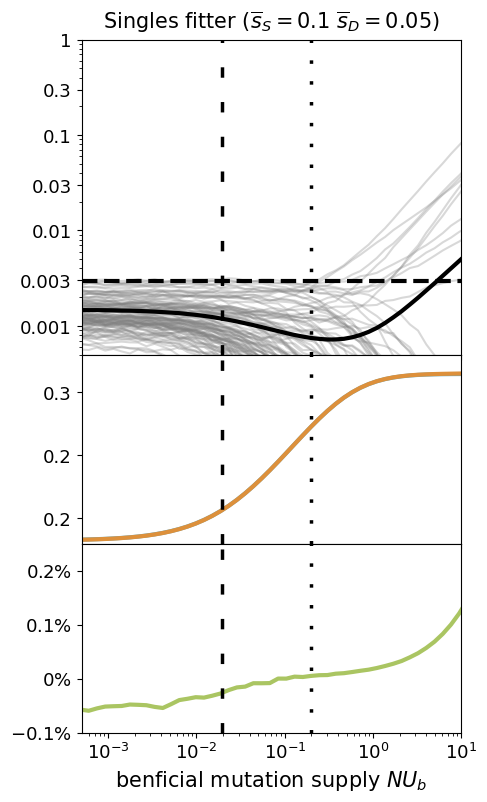

In [58]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.9, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii >= 0 and ii <100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)



axes[0].set_title('Singles fitter ($\\overline{s}_S=0.1\,\,\overline{s}_D=0.05$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,1)
axes[0].set_yscale("log")



axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3,1]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3,1], fontsize=13)



##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.18,0.33)



axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(-0.001,0.0025)
axes[2].set_yticks([-0.001,0.0,0.001, 0.002])
axes[2].set_yticklabels(["$-0.1 \\%$","$0 \\%$","$0.1 \\%$", "$0.2 \\%$"], fontsize=13)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.3),10)
axes[2].set_xscale("log")


plt.tick_params(axis="x", labelsize=13) 


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
plt.savefig("FD_W_12_sS01_sD005.pdf", transparent=True, bbox_inches='tight')
plt.show()


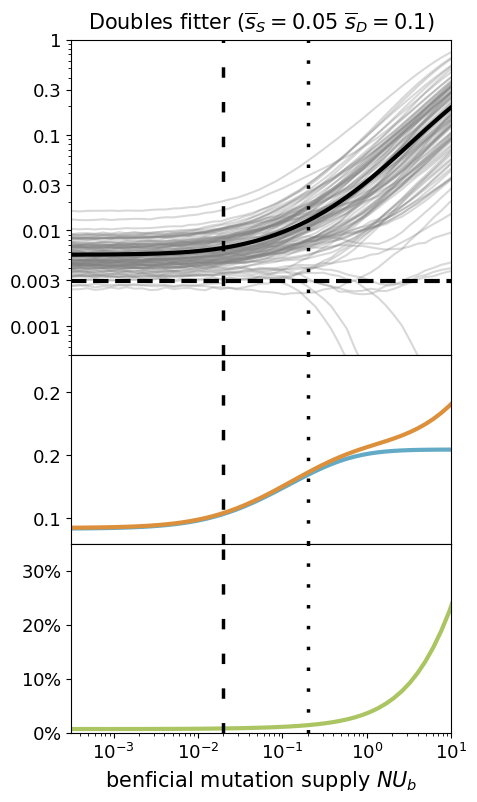

In [56]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.9, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii >= 0 and ii < 100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)



axes[0].set_title('Doubles fitter ($\\overline{s}_S=0.05\,\,\overline{s}_D=0.1$)', fontsize=15,pad=8)

axes[0].set_ylim(0.0005,1)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3,1]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3,1], fontsize=13)



##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.08,0.23)

axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")

axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0,0.35)
axes[2].set_yticks([0.0,0.1, 0.2, 0.3])
axes[2].set_yticklabels(["$0 \\%$","$10 \\%$", "$20 \\%$", "$30 \\%$"], fontsize=13)

axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),10)
axes[2].set_xscale("log")

plt.tick_params(axis="x", labelsize=13) 

handles, labels = axes[0].get_legend_handles_labels()
for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

plt.savefig("FD_W_12_sS005_sD01.pdf", transparent=True, bbox_inches='tight')
plt.show()


# ns=120, nd=200 with exponential distribution

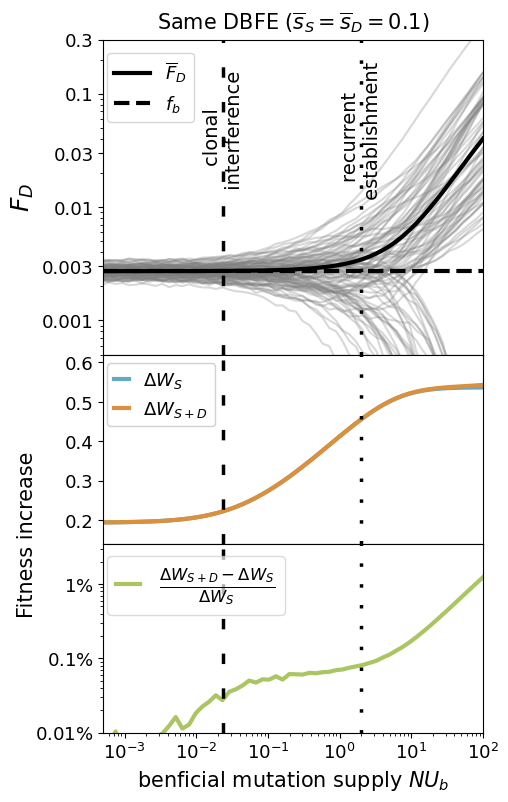

In [22]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.9, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 0 and ii <=100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

# Add text at the vertical line
axes[0].text(np.real(epsilon/(4*lambertw(epsilon/(4*U))))+0.0006, 0.045, 'clonal \n interference', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)

axes[0].text(np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))+0.005, 0.045, 'recurrent \n establishment', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)


axes[0].set_ylabel('$F_D$', fontsize=18)

    
axes[0].set_title('Same DBFE ($\\overline{s}_S=\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)

axes[0].legend(fontsize=13, loc=(0.01,0.74))


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.14,0.62)


legend = axes[1].legend(handlelength=0.8, fontsize=13, loc=(0.01,0.62))
legend.get_frame().set_alpha(0.9)

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.035)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$"], fontsize=13)

legend = axes[2].legend(handlelength=1, fontsize=17, loc=(0.01,0.62))
legend.get_frame().set_alpha(0.7)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.3),100)
axes[2].set_xscale("log")

plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


fig.text(-0.05, 0.33, 'Fitness increase', va='center', rotation='vertical', fontsize=15)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
plt.savefig("FD_W_120_sigma01Log.pdf", transparent=True, bbox_inches='tight')

plt.show()


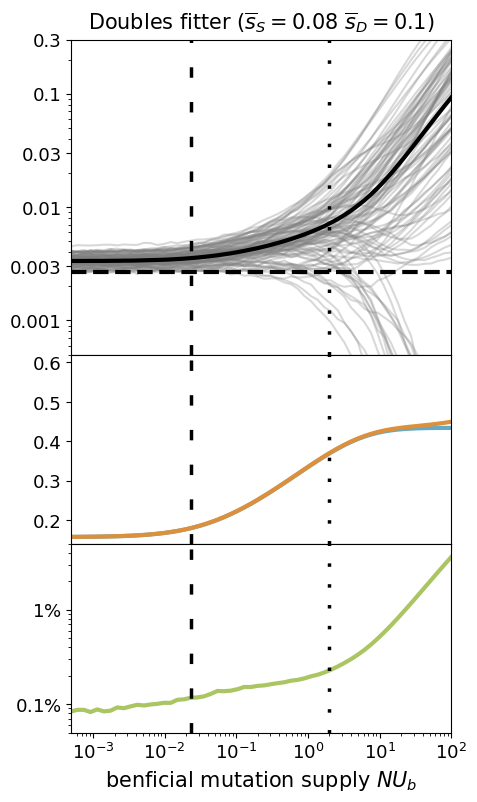

In [26]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.9, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


 
    
axes[0].set_title('Doubles fitter ($\\overline{s}_S=0.08\,\,\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.14,0.62)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0005,0.05)
axes[2].set_yscale("log")

axes[2].set_yticks([0.001,0.01])
axes[2].set_yticklabels(["$0.1 \\%$","$1 \\%$"], fontsize=13)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.3),100)
axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
plt.savefig("FD_W_120_sS008_sD01Log.pdf", transparent=True, bbox_inches='tight')

plt.show()

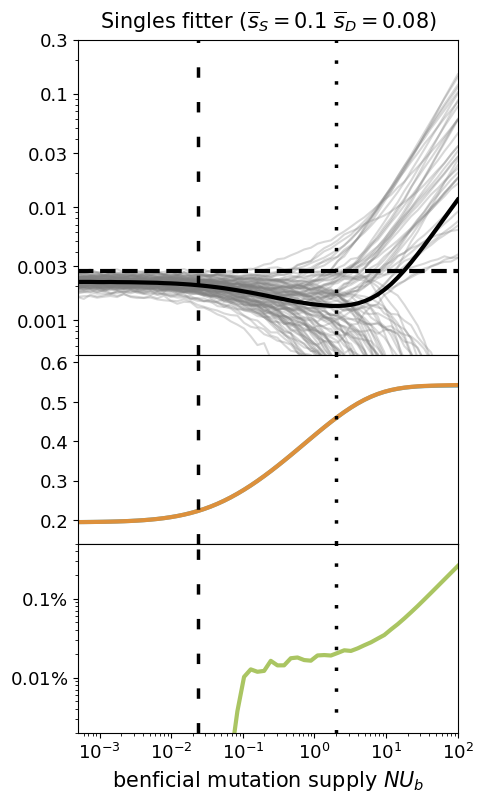

In [24]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.9, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii >= 0 and ii <100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


    

    
axes[0].set_title('Singles fitter ($\\overline{s}_S=0.1\,\,\overline{s}_D=0.08$)', fontsize=15,pad=8)



axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.14,0.62)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/6.09))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

#axes[2].set_ylim(-0.001,0.004)


axes[2].set_ylim(0.00002,0.005)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$"], fontsize=13)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.3),100)

axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
plt.savefig("FD_W_120_sS01_sD008Log.pdf", transparent=True, bbox_inches='tight')

plt.show()
plt.close()

# ns=120, nd=200 with power law DFE (alpha=2.5)

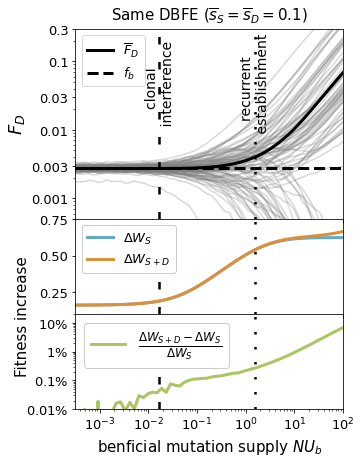

In [53]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 0 and ii <=100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

# Add text at the vertical line
axes[0].text(np.real(epsilon/(4*lambertw(epsilon/(4*U))))+0.0006, 0.045, 'clonal \n interference', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)

axes[0].text(np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))+0.005, 0.045, 'recurrent \n establishment', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)


axes[0].set_ylabel('$F_D$', fontsize=18)

    
axes[0].set_title('Same DBFE ($\\overline{s}_S=\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)

axes[0].legend(fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.1,0.75)

legend = axes[1].legend(fontsize=13)
legend.get_frame().set_alpha(1)

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.2)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01,0.1])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$","$10 \\%$"], fontsize=13)

legend = axes[2].legend(fontsize=17)
legend.get_frame().set_alpha(1)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)
axes[2].set_xscale("log")

plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


fig.text(-0.05, 0.31, 'Fitness increase', va='center', rotation='vertical', fontsize=15)



handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
    

#plt.savefig("FD_W_120_sigma01LogPowerLaw25.pdf", bbox_inches='tight')

plt.show()

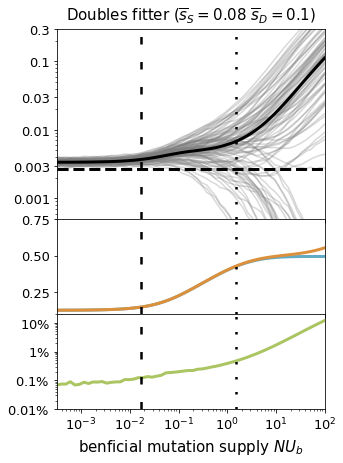

In [48]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


   
axes[0].set_title('Doubles fitter ($\\overline{s}_S=0.08\,\,\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)

##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.1,0.75)

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.2)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01,0.1])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$","$10 \\%$"], fontsize=13)


axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)
axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp


#plt.savefig("FD_W_120_sS008_sD01LogPowerLaw25.pdf", bbox_inches='tight')

plt.show()

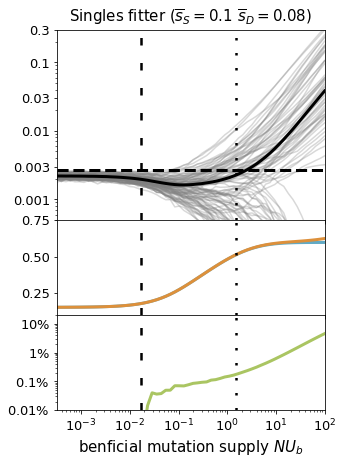

In [56]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    #axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


    
axes[0].set_title('Singles fitter ($\\overline{s}_S=0.1\,\,\overline{s}_D=0.08$)', fontsize=15,pad=8)



axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.1,0.75)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)



axes[2].set_ylim(0.0001,0.2)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01,0.1])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$","$10 \\%$"], fontsize=13)




axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)

axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    

#plt.savefig("FD_W_120_sS01_sD008LogPowerLaw25.pdf", bbox_inches='tight')

plt.show()

# Multiplot

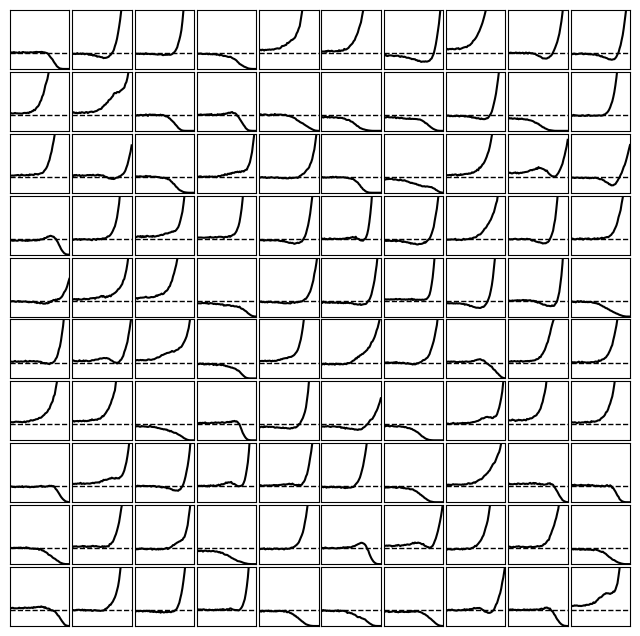

In [80]:
Nfigs = 10

#fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(14, 14))
fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(8, 8))

offset = 0
for i in range(Nfigs):
    for j in range(Nfigs):
        r = ris[offset+i+Nfigs*j]
        ax[i,j].plot(x,np.sum(r[:,ns+1:],axis = 1),color="black")
        ax[i,j].set_xscale("log")
        #ax[i,j].set_yscale("log")
        #ax[i,j].set_ylim(0.0005,1)
        ax[i,j].set_ylim(0.0,0.01)
        ax[i,j].set_xlim(10**(-3.3),10**(2.))
        
        #ax[i,j].set_ylim(0.0005,0.03)
        #ax[i,j].set_xlim(10**(-3.5),10**(2.))
        ax[i,j].axhline([fractionAAlevel],linestyle="--", color="black",linewidth=1)

        
for a in ax.flatten():
    a.set_xticks([])     
    a.set_yticks([]) 

plt.subplots_adjust(wspace=.05, hspace=.05)

plt.savefig("plotGrid.pdf", bbox_inches='tight')


In [71]:
def π(s):
    out = 1.0-np.exp(-2*s)
    out[out<0] = 0
    return out


def WM_model(fs, fd, mus, mud):
    fs = fs - 1   
    fd = fd - 1
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    Ps = mus*π(fs)
    Pd = mud*π(fd)
    Z = Pd.sum() + Ps.sum()
    return Pd.sum()/Z

def CI_model(fs,fd,MS, mus,mud):
    out = []
    fs = fs - 1   
    fd = fd - 1
    
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    ns = len(fs)
    nd = len(fd)
    for ms in MS:
        N = int(ms/U)
        Λs = N*np.log(N)/np.log(1+fs)
        Λd = N*np.log(N)/np.log(1+fd)
        
        for i in range(ns):
            Λs[i] *= (mus*np.sum(π(fs[fs>fs[i]])) + mud*np.sum(π(fd[fd>fs[i]])))
        for i in range(nd):
            Λd[i] *= (mus*np.sum(π(fs[fs>fd[i]])) + mud*np.sum(π(fd[fd>fd[i]])))
            
        Ps = π(fs)*np.exp(-Λs)*mus
        Pd = π(fd)*np.exp(-Λd)*mud
        
        Z = Ps.sum()+Pd.sum()      
        Pd /= Z
        out.append(Pd.sum())

    return out

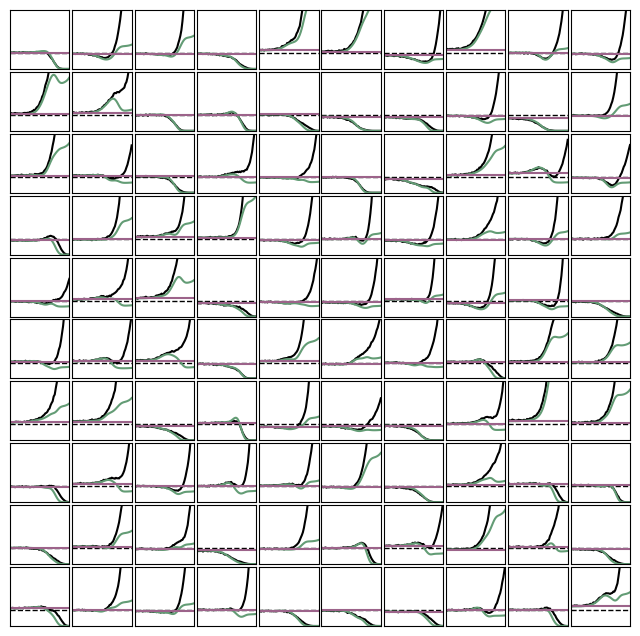

In [81]:
# amino acid level 

Nfigs = 10

#fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(15, 15))
fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(8, 8))

offset = 0

for i in range(Nfigs):
    for j in range(Nfigs):
        r = ris[offset+i+Nfigs*j]
        ax[i,j].plot(x,np.sum(r[:,ns+1:],axis = 1),color="black")
                
        ax[i,j].set_xscale("log")
        #ax[i,j].set_yscale("log")
        #ax[i,j].set_xlim(10**(-3),10**(1.))
        
        #ax[i,j].set_ylim(0.0005,1)
        #ax[i,j].set_ylim(0.0005,0.3)
        #ax[i,j].set_xlim(10**(-3.5),10**(2.))

        ax[i,j].set_ylim(0.0,0.01)
        ax[i,j].set_xlim(10**(-3.3),10**(2.))
        
        ax[i,j].axhline([fractionAAlevel],linestyle="--", color="black",linewidth=1)
        ftemp = f[offset+i+Nfigs*j]
        fs = ftemp[1:ns+1].copy()
        fd = ftemp[ns+1:].copy()
        ax[i,j].plot(x,CI_model(fs,fd,x, mus/6.09, mud/10.23),color="#639C75",linewidth=1.5)
        ax[i,j].axhline(WM_model(fs,fd, mus/6.09, mud/10.23),color="#9C638A",linewidth=1.5,label= "WM")

        
                
for a in ax.flatten():
    a.set_xticks([])     
    a.set_yticks([]) 

plt.subplots_adjust(wspace=.05, hspace=.05)

plt.savefig("plotGridB.pdf", bbox_inches='tight')


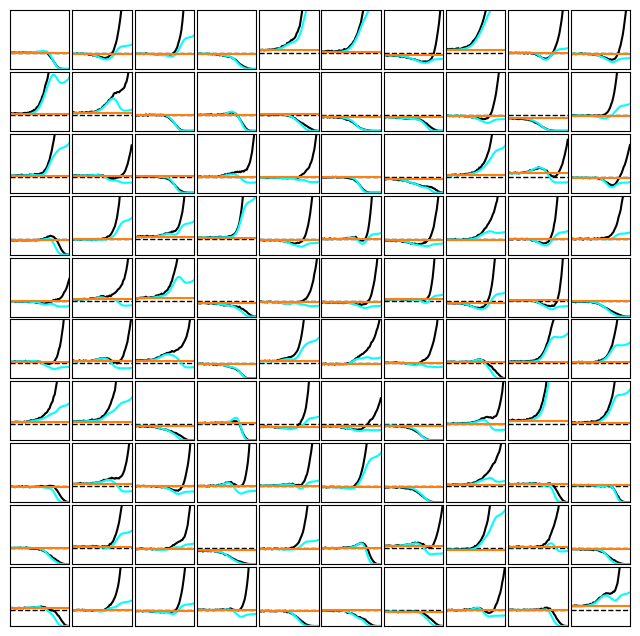

In [82]:
# amino acid level 

Nfigs = 10

#fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(15, 15))
fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(8, 8))

offset = 0

for i in range(Nfigs):
    for j in range(Nfigs):
        r = ris[offset+i+Nfigs*j]
        ax[i,j].plot(x,np.sum(r[:,ns+1:],axis = 1),color="black")
                
        ax[i,j].set_xscale("log")
        ax[i,j].set_ylim(0,0.01)
        ax[i,j].set_xlim(10**(-3.3),10**(2.))
        ax[i,j].axhline([fractionAAlevel],linestyle="--", color="black",linewidth=1)
        #ax[i,j].plot(x,CI_model(f[i+Nfigs*j],x),color="cyan",linewidth=3)
        ftemp = f[offset+i+Nfigs*j]
        fs = ftemp[1:ns+1].copy()
        fd = ftemp[ns+1:].copy()
        ax[i,j].plot(x,CI_model(fs,fd,x, mus/6.09, mud/10.23),color="cyan",linewidth=1.5)
        ax[i,j].axhline(WM_model(fs,fd, mus/6.09, mud/10.23),color="C1",linewidth=1.5,label= "WM")

          
                
for a in ax.flatten():
    a.set_xticks([])     
    a.set_yticks([]) 

#plt.subplots_adjust(wspace=.05, hspace=.05)
plt.subplots_adjust(wspace=.05, hspace=.05)

plt.savefig("plotGridB2.pdf", bbox_inches='tight')


# Exponential vs Heavy-tailed distribution

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import seaborn as sns
import pandas as pd
from matplotlib import rcParams
from scipy.special import lambertw
from scipy.stats import gennorm
from scipy.special import gamma
from scipy.integrate import quad
import matplotlib.ticker as ticker

def calc_harmonic(n):
    return sum(1/d for d in range(1, n + 1))


def all_fct(folder):
    ris0 = []
    ris = []
    f = []

    for sfile in sorted(glob.glob(folder+'/*ris.npy')):
        result = re.search(''+folder+'/(.*)_', sfile)
        seed = result.group(1)
        ris.append(np.load(folder+"/"+seed+"_ris.npy"))
        ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
        f.append(np.load(folder+"/"+seed+"_fit.npy"))

    x = np.load(glob.glob(folder+'/*MS.npy')[0])
    ris = np.array(ris)
    ris0 = np.array(ris0)
    f = np.array(f)


    if ris.shape[2] == 33:
        ns=12
        nd=20
    elif ris.shape[2] == 321:
        ns=120
        nd=200
    else:
        print("Error")
        
    U = ns*mus/5.80 + nd*mud/9.63
    #Us = ns*mus/5.80
        
    landscapes = ris.shape[0]



    N_list = []
    for i in range(len(x)):
        ms = x[i]
        N = np.floor(ms/U)
        N_list.append(N) 
    N_list = np.array(N_list)


    ΔW_SD = []
    ΔW_S = []

    for j in range(ris.shape[1]):
        R = ris[:,j,:]
        ΔW_SD.append(((f-1.) * R).sum(axis=1).mean())

        R = ris0[:,j,:]
        ΔW_S.append(((f[:,:ns+1]-1.) * R).sum(axis=1).mean())

    ΔW_SD = np.array(ΔW_SD)
    ΔW_S = np.array(ΔW_S)
    y= (ΔW_SD-ΔW_S)/ΔW_S
    
    return x, y, ris[:,:,ns+1:].sum(axis=2).mean(axis=0), N_list

In [68]:
alpha = 4*10**(-3)
mus = 10**(-10)
mud = 10**(-10)*alpha

mus=mus*3*0.76
mud=mud*3*0.99*0.52

#U = ns*mus/5.80 + nd*mud/9.63
#Us = ns*mus/5.80
#fractionAAlevel = mud/9.63*nd/(mud/9.63*nd+mus/5.80*ns)


########################################################
#Exponential decay

folder_1 = '/Users/alexander/Desktop/RandomLandscapes/Old/Weibull/mean01ns12nd20_LR'
folder_2 = '/Users/alexander/Desktop/RandomLandscapes/Old/Weibull/mean01ns120nd200_LR'

########################################################
########################################################
#Power law decay

folder_3 = '/Users/alexander/Desktop/RandomLandscapes/Old/Pareto/mean01shape25ns12nd20_LR'
folder_4 = '/Users/alexander/Desktop/RandomLandscapes/Old/Pareto/mean01shape25ns12nd20_LR'

#folder_4 = '/Users/alexander/Pareto/mean01shape25ns120nd200_LR'

folder_5 = '/Users/alexander/Desktop/RandomLandscapes/Old/Pareto/mean01shape15ns12nd20_LR'
folder_6 = '/Users/alexander/Desktop/RandomLandscapes/Old/Pareto/mean01shape15ns120nd200_LR'



folder_list = [folder_1, folder_2, folder_3, folder_4, folder_5, folder_6]
#folder_list = [folder_1, folder_2, folder_3, folder_5, folder_6]

x_list = []
w_list = []
fd_list = []
N_list = []
for i in range(len(folder_list)):
    x, w, fd, Nv= all_fct(folder_list[i])
    x_list.append(x)
    w_list.append(w)
    fd_list.append(fd)
    N_list.append(Nv)



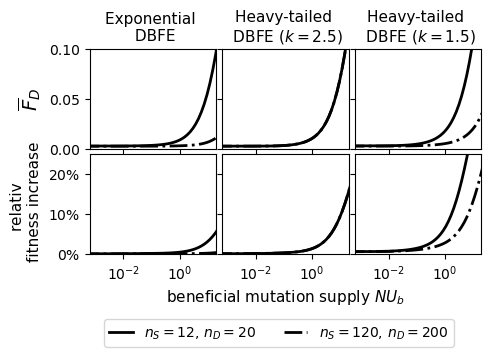

In [69]:
# Create a figure and a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(9/2, 5/2),sharex=True,sharey='row')

# Create your plots and customize them as needed
# For example, you can plot data or add text, titles, etc. to each subplot

# Subplot 1
axs[0, 0].plot(x_list[0],fd_list[0],color="black",linewidth=2, label="$n_S=12,\,n_D=20$")
axs[0, 0].plot(x_list[1],fd_list[1],"-.", color="black",linewidth=2, label="$n_S=120,\,n_D=200$")
axs[0, 0].set_ylabel('$\overline{F}_D$', fontsize=14)  # Add y-axis label to the first subplot
axs[0, 0].set_title('Exponential \n DBFE', fontsize=11,pad=6)
# Add more customizations if needed

# Subplot 2
axs[0, 1].plot(x_list[2],fd_list[2],color="black",linewidth=2)
axs[0, 1].plot(x_list[3],fd_list[3],"-.",color="black",linewidth=2)
axs[0, 1].set_title('Heavy-tailed \n DBFE ($k=2.5$)', fontsize=11,pad=6)

# Subplot 3
axs[0, 2].plot(x_list[4],fd_list[4],color="black",linewidth=2)
axs[0, 2].plot(x_list[5],fd_list[5],"-.",color="black",linewidth=2)
axs[0, 2].set_title('Heavy-tailed \n DBFE ($k=1.5$)', fontsize=11,pad=6)

# Subplot 4
axs[1, 0].plot(x_list[0],w_list[0],color="black",linewidth=2)
axs[1, 0].plot(x_list[1],w_list[1],"-.",color="black",linewidth=2)
axs[1, 0].set_ylabel('relativ \n fitness increase',fontsize=11)  # Add y-axis label to the first subplot
#axs[1, 0].set_ylabel('$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$',fontsize=13)  # Add y-axis label to the first subplot

#axs[1, 0].set_xlabel('beneficial mutation supply $NU_b$',fontsize=11)  # Add y-axis label to the first subplot
#axs[1, 0].set_title('Subplot 4')


# Subplot 5
axs[1, 1].plot(x_list[2],w_list[2],color="black",linewidth=2)
axs[1, 1].plot(x_list[3],w_list[3],"-.",color="black",linewidth=2)
axs[1, 1].set_xlabel('beneficial mutation supply $NU_b$',fontsize=11)  # Add y-axis label to the first subplot
#axs[1, 1].set_title('Subplot 5')


# Subplot 6
axs[1, 2].plot(x_list[4],w_list[4],color="black",linewidth=2)
axs[1, 2].plot(x_list[5],w_list[5],"-.",color="black",linewidth=2)
#axs[1, 2].set_xlabel('beneficial mutation supply $NU_b$',fontsize=7)  # Add y-axis label to the first subplot
#axs[1, 2].set_title('Subplot 6')

axs[0, 0].set_xlim(10**(-3.2),20)  # Add y-axis label to the first subplot
axs[0, 0].set_ylim(0,0.1)  # Add y-axis label to the first subplot
axs[0, 0].set_xscale("log")
axs[1, 0].set_ylim(10**(-4),0.25)  # Add y-axis label to the first subplot
axs[0, 0].set_yticks([0.0, 0.05, 0.1])  # Set y-axis ticks for the first row
#axs[1, 0].set_yticks([0.0, 0.15, 0.3])  # Set y-axis ticks for the first row

axs[1, 0].set_yticks([0.0,0.1,0.2])
axs[1, 0].set_yticklabels(["$0 \\%$","$10 \\%$","$20 \\%$"])


#axs[1, 0].set_xticks([10**(-3), 10**(-1), 10**(1)])  # Set y-axis ticks for the first row
#axs[1, 1].set_xticks([10**(-3), 10**(-1), 10**(1)])  # Set y-axis ticks for the first row
#axs[1, 2].set_xticks([10**(-3), 10**(-1), 10**(1)])  # Set y-axis ticks for the first row

axs[1, 0].set_xticks([10**(-2), 10**(0)])  # Set y-axis ticks for the first row
axs[1, 1].set_xticks([10**(-2), 10**(0)])  # Set y-axis ticks for the first row
axs[1, 2].set_xticks([10**(-2), 10**(0)])  # Set y-axis ticks for the first row



# Adjust the spacing between subplots using subplots_adjust
plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.9, wspace=0.05, hspace=0.05)


# Add a common legend below the figure
fig.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.32),fontsize=10, handlelength=1.7)

# Adjust the space between subplots to avoid overlapping titles and labels
#plt.tight_layout()
plt.savefig("heavytailedv7.pdf", bbox_inches='tight')

# Show the figure
plt.show()